In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [4]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum()

In [5]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [6]:
def derivative_w2(Z, T, Y):
    return -Z.T.dot(T - Y)

In [7]:
def derivative_b2(T, Y):
    return (-(T - Y)).sum(axis=0)

In [8]:
def derivative_w1_sig(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * ( 1 - Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [9]:
def derivative_b1_sig(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

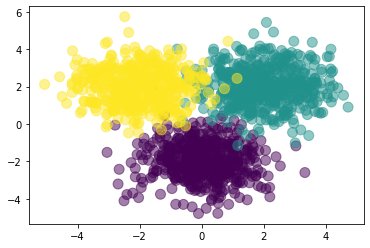

In [10]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

# randomly initialize weights
w1 = np.random.randn(D, M)
b1 = np.random.randn(M)
w2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [15]:
forward(X, W1, b1, W2, b2)

(array([[0.59705618, 0.26666874, 0.13627507],
        [0.60428705, 0.23104678, 0.16466616],
        [0.61403158, 0.22460741, 0.16136101],
        ...,
        [0.55080646, 0.28533149, 0.16386206],
        [0.53711007, 0.32217066, 0.14071927],
        [0.55920635, 0.27702478, 0.16376888]]),
 array([[0.98740433, 0.16352235, 0.63359916],
        [0.98804315, 0.16701884, 0.77501904],
        [0.99317596, 0.12879996, 0.78264072],
        ...,
        [0.92612338, 0.34888585, 0.6634519 ],
        [0.91332722, 0.36163093, 0.5455195 ],
        [0.94051021, 0.32194054, 0.67861893]]))

In [14]:
# randomly initialize weights
w1 = np.random.randn(D, M)
B1 = np.random.randn(M)
w2 = np.random.randn(M, K)
B2 = np.random.randn(K)

W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()


('cost:', 5194.384989687937, 'classification_rate:', 0.3333333333333333)
('cost:', 172.00123406211384, 'classification_rate:', 0.9706666666666667)
('cost:', 143.76840796571733, 'classification_rate:', 0.9726666666666667)
('cost:', 134.22392892949662, 'classification_rate:', 0.9733333333333334)
('cost:', 129.0188225329082, 'classification_rate:', 0.9726666666666667)
('cost:', 125.35440443867006, 'classification_rate:', 0.972)
('cost:', 122.44667422452588, 'classification_rate:', 0.972)
('cost:', 120.08148076108981, 'classification_rate:', 0.972)
('cost:', 118.2255252462133, 'classification_rate:', 0.972)
('cost:', 116.84625892493906, 'classification_rate:', 0.9713333333333334)


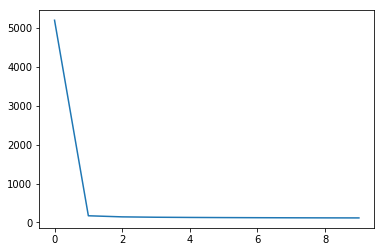

In [12]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3

costs_sig = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_sig.append(c)

    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs_sig)
plt.show()

('cost:', 5194.384989687937, 'classification_rate:', 0.3333333333333333)
('cost:', 163.2976724921809, 'classification_rate:', 0.9713333333333334)
('cost:', 141.3234571999168, 'classification_rate:', 0.9706666666666667)
('cost:', 124.5795929098622, 'classification_rate:', 0.97)
('cost:', 115.55359938282005, 'classification_rate:', 0.968)
('cost:', 111.78251803669257, 'classification_rate:', 0.9673333333333334)
('cost:', 110.54106087638945, 'classification_rate:', 0.9693333333333334)
('cost:', 110.00121865500759, 'classification_rate:', 0.97)
('cost:', 109.7148410608774, 'classification_rate:', 0.9693333333333334)
('cost:', 109.54275464283847, 'classification_rate:', 0.9706666666666667)


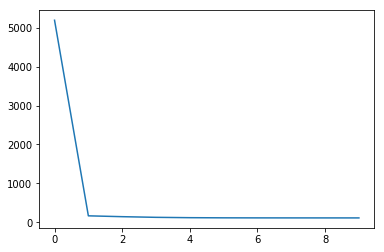

In [13]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
mu = 0.9
vW2 = 0
vb2 = 0
vW1 = 0
vb1 = 0

costs_reg_momentum = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_reg_momentum.append(c)

        
    #gradients
    gW2 = derivative_w2(hidden, T, output)
    gb2 = derivative_b2(T, output)    
    gW1 = derivative_w1_sig(X, hidden, T, output, W2)
    gb1 = derivative_b1_sig(T, output, W2, hidden)
                                            
    vW2 = mu * vW2 - learning_rate * gW2
    vb2 = mu * vb2 - learning_rate * gb2
    vW1 = mu * vW1 - learning_rate * gW1
    vb1 = mu * vb1 - learning_rate * gb1
                                            
    W2 += vW2
    b2 += vb2
    W1 += vW1
    b1 += vb1
    
plt.plot(costs_reg_momentum)
plt.show()

('cost:', 5194.384989687937, 'classification_rate:', 0.3333333333333333)
('cost:', 118.85316463405387, 'classification_rate:', 0.97)
('cost:', 110.13638925365555, 'classification_rate:', 0.9693333333333334)
('cost:', 109.03249531551245, 'classification_rate:', 0.97)
('cost:', 108.38173696700818, 'classification_rate:', 0.9706666666666667)
('cost:', 107.89570159135275, 'classification_rate:', 0.97)
('cost:', 107.50202465064635, 'classification_rate:', 0.9713333333333334)
('cost:', 107.16850776445102, 'classification_rate:', 0.9713333333333334)
('cost:', 106.87967964748916, 'classification_rate:', 0.9713333333333334)
('cost:', 106.62764765959093, 'classification_rate:', 0.9713333333333334)


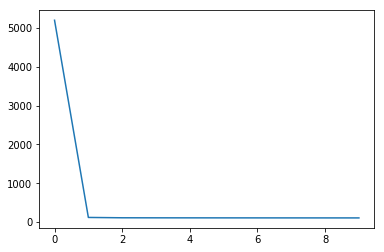

In [14]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
mu = 0.9
vW2 = 0
vb2 = 0
vW1 = 0
vb1 = 0

costs_nesterov_momentum = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_nesterov_momentum.append(c)

        
    #gradients
    gW2 = derivative_w2(hidden, T, output)
    gb2 = derivative_b2(T, output)    
    gW1 = derivative_w1_sig(X, hidden, T, output, W2)
    gb1 = derivative_b1_sig(T, output, W2, hidden)
                                            
    vW2 = mu * vW2 - learning_rate * gW2
    vb2 = mu * vb2 - learning_rate * gb2
    vW1 = mu * vW1 - learning_rate * gW1
    vb1 = mu * vb1 - learning_rate * gb1
                                            
    W2 += mu * vW2 - learning_rate * gW2
    b2 += mu * vb2 - learning_rate * gb2
    W1 += mu * vW1 - learning_rate * gW1
    b1 += mu * vb1 - learning_rate * gb1
    
plt.plot(costs_nesterov_momentum)
plt.show()

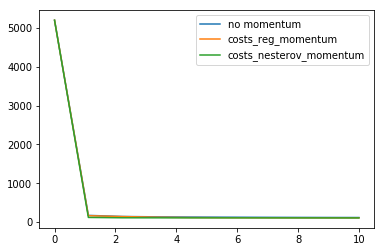

In [15]:
x1 = np.linspace(0, 10, len(costs_sig))
plt.plot(x1, costs_sig, label="no momentum")
x2 = np.linspace(0, 10, len(costs_reg_momentum))
plt.plot(x2, costs_reg_momentum, label="costs_reg_momentum")
x3 = np.linspace(0, 10, len(costs_nesterov_momentum))
plt.plot(x3, costs_nesterov_momentum, label="costs_nesterov_momentum")
plt.legend()
plt.show()